# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

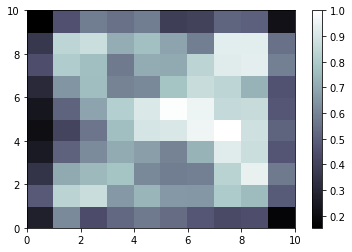

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

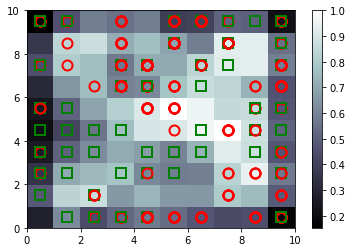

In [18]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [19]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,8)], mappings[(9,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15686461.0
15684512.0
15680643.0
15668830.0
15796569.0
15805212.0
15712877.0
15691150.0
15785339.0
15678210.0
15740458.0
15686885.0
15664615.0
15585928.0
15680895.0
15716276.0
15807546.0
15583067.0
15773869.0
15796111.0
15809800.0
15623072.0
15802071.0
15790630.0
15750055.0
15647898.0
15679801.0
15748499.0
15587038.0
15770406.0
15592773.0
15732943.0
15781975.0
15770255.0
15773789.0
15794868.0
15762392.0
15705506.0
15812470.0
15591107.0
15674583.0
15588854.0
15788215.0
15699294.0
15722535.0
15796813.0
15731166.0
15649379.0
15587297.0
15797246.0
15800773.0
15729771.0
15609823.0
15594133.0
15706268.0
15653147.0
15735572.0
15751167.0
15778142.0
15721507.0
15802106.0
15812918.0
15711249.0
15812766.0
15784526.0
15687765.0
15658504.0
15700046.0
15569595.0
15587443.0
15769356.0
15711759.0
15665181.0
15808223.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Training SOM... done!


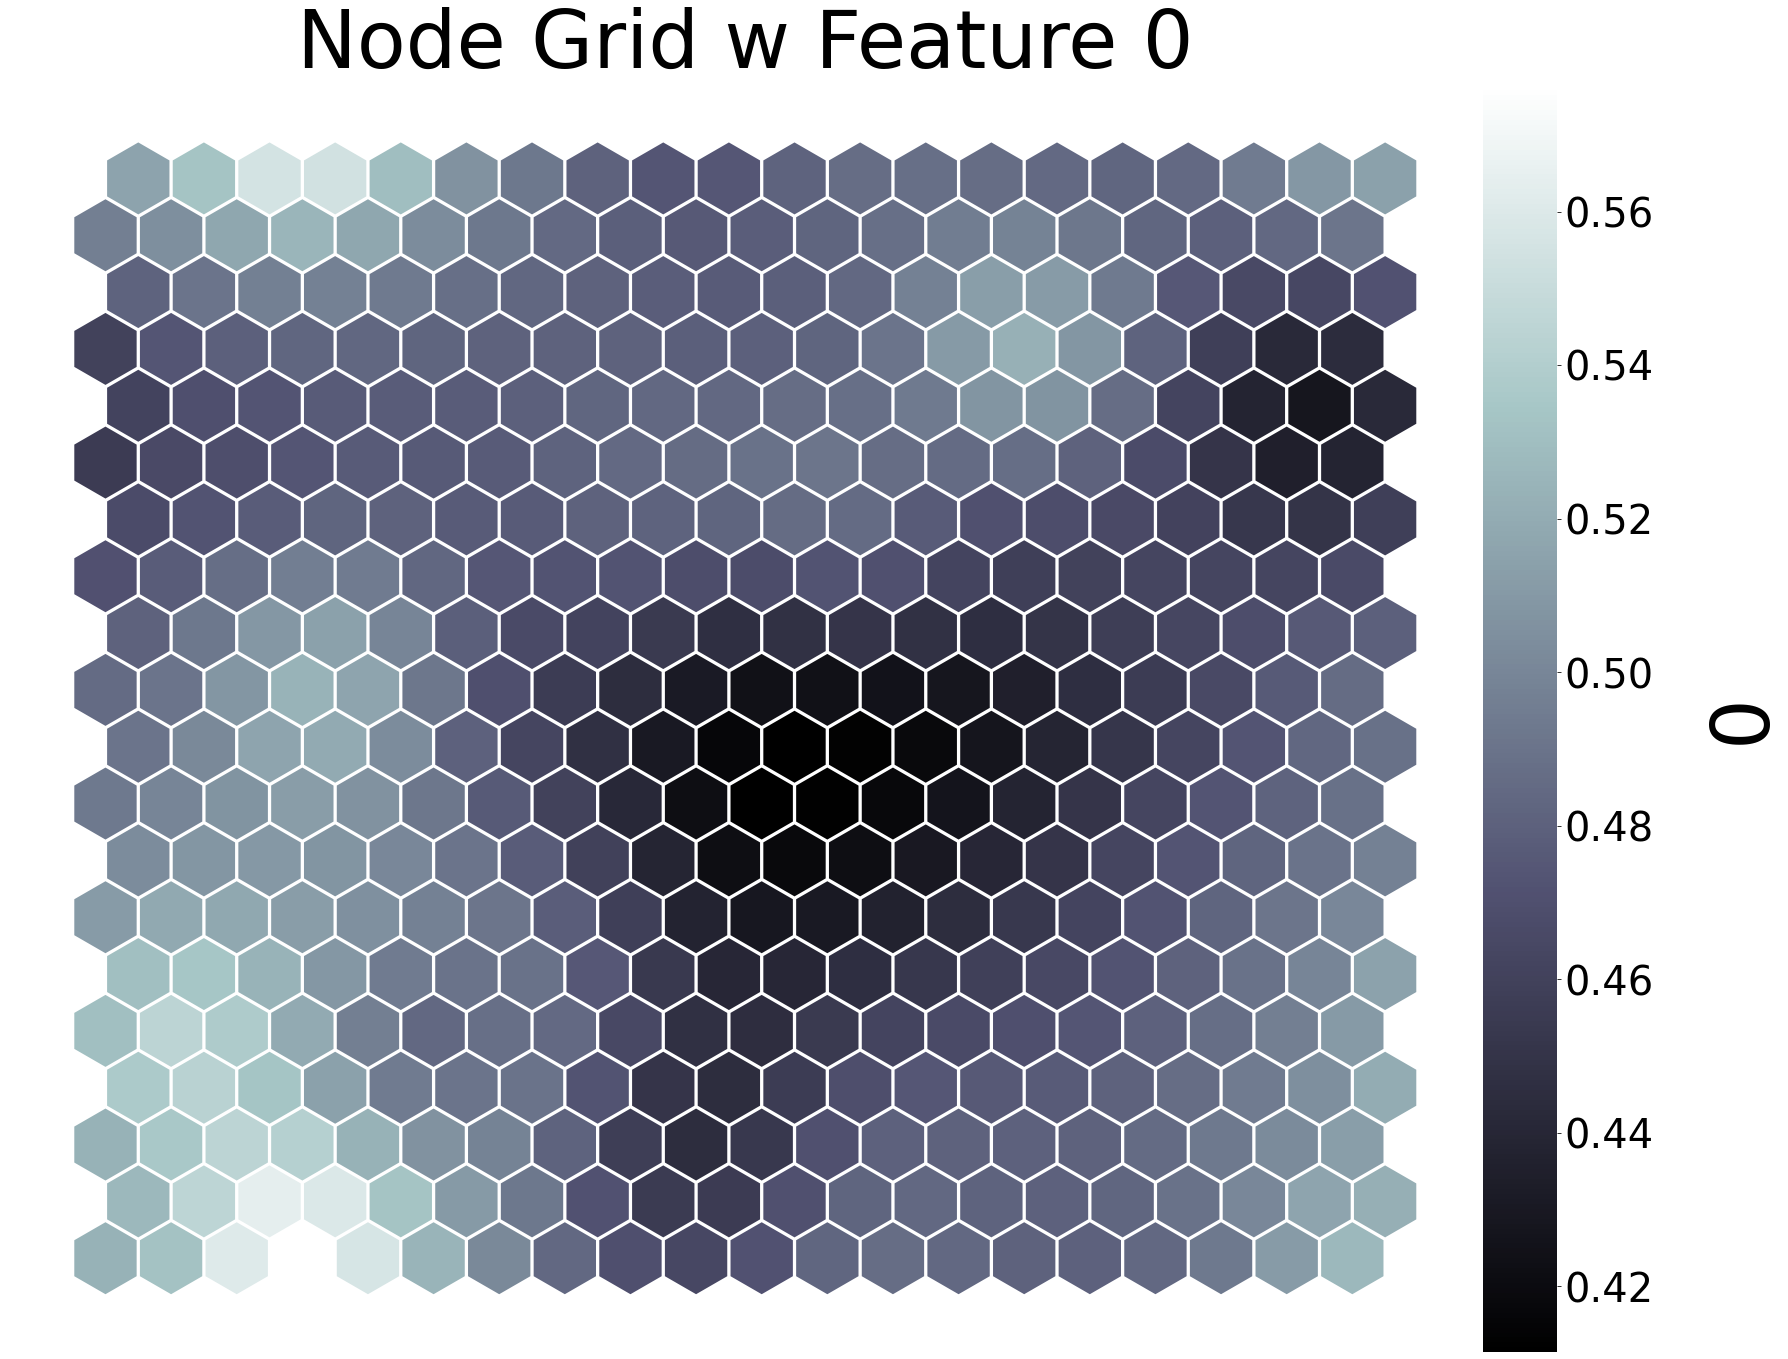

In [12]:
# ! pip install SimpSOM
import pandas as pd
import simpsom as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.SOMNet(20, 20, X, PBC=True)
# net.train(0.5, 100)
net.train(train_algo='online', epochs=1000)
net.save('filename_weights')
net.nodes_graph(colnum=0)

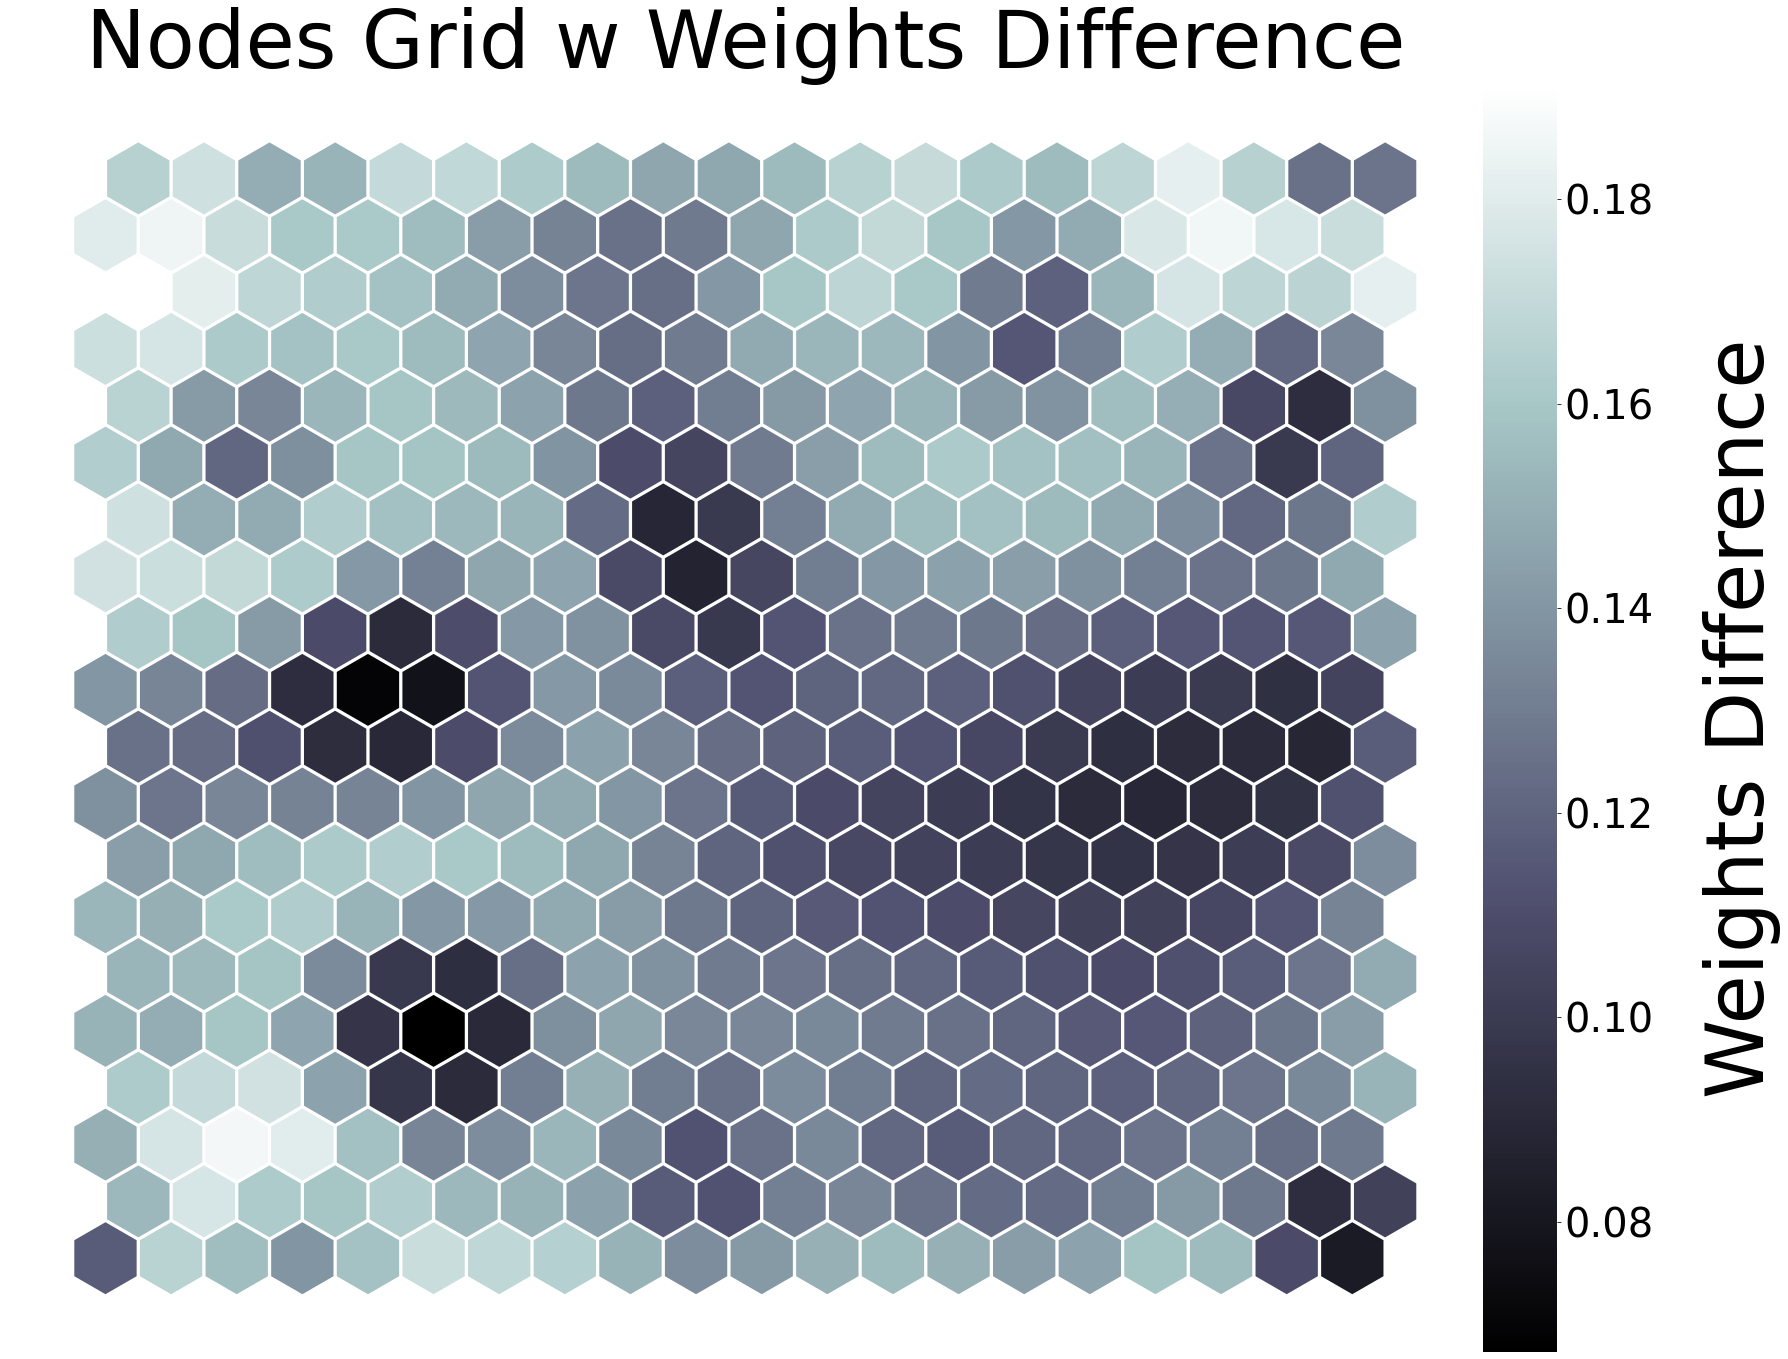

In [13]:
net.diff_graph()

In [14]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[5.0, 3.4641016151377553],
 [8.5, 11.258330249197702],
 [9.0, 1.7320508075688776],
 [14.0, 0.0],
 [18.0, 12.124355652982143],
 [14.5, 14.722431864335457],
 [5.0, 8.660254037844387],
 [14.5, 14.722431864335457],
 [5.0, 8.660254037844387],
 [14.0, 0.0],
 [19.0, 0.0],
 [19.0, 0.0],
 [19.0, 0.0],
 [19.0, 0.0],
 [5.0, 3.4641016151377553],
 [5.0, 8.660254037844387],
 [19.0, 0.0],
 [14.0, 13.856406460551021],
 [4.0, 8.660254037844387],
 [14.0, 13.856406460551021],
 [8.5, 11.258330249197702],
 [12.0, 1.7320508075688776],
 [5.0, 8.660254037844387],
 [2.0, 12.124355652982143],
 [5.0, 8.660254037844387],
 [19.0, 0.0],
 [5.0, 8.660254037844387],
 [19.0, 0.0],
 [14.0, 13.856406460551021],
 [19.0, 0.0],
 [19.0, 0.0],
 [9.0, 1.7320508075688776],
 [3.0, 0.0],
 [19.0, 0.0],
 [1.0, 3.4641016151377553],
 [19.0, 8.660254037844387],
 [3.0, 0.0],
 [19.0, 0.0],
 [14.0, 0.0],
 [15.0, 0.0],
 [2.0, 12.124355652982143],
 [5.0, 3.4641016151377553],
 [2.0, 12.124355652982143],
 [19.0, 0.0],
 [19.0, 8.660254037844

<Figure size 432x288 with 0 Axes>

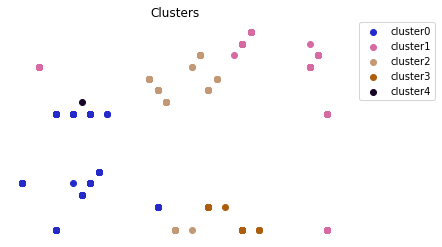

[[0,
  2,
  6,
  8,
  14,
  15,
  18,
  22,
  24,
  26,
  31,
  32,
  34,
  36,
  41,
  47,
  50,
  51,
  52,
  53,
  54,
  58,
  60,
  66,
  67,
  70,
  72,
  75,
  76,
  77,
  83,
  84,
  85,
  88,
  89,
  90,
  91,
  92,
  95,
  97,
  101,
  102,
  107,
  109,
  110,
  111,
  114,
  121,
  127,
  132,
  140,
  142,
  148,
  150,
  151,
  152,
  155,
  156,
  157,
  159,
  160,
  161,
  165,
  166,
  168,
  172,
  175,
  176,
  177,
  179,
  180,
  183,
  184,
  185,
  186,
  187,
  188,
  190,
  193,
  199,
  202,
  206,
  208,
  209,
  212,
  214,
  216,
  217,
  218,
  221,
  223,
  226,
  231,
  232,
  238,
  244,
  249,
  250,
  251,
  253,
  256,
  257,
  258,
  259,
  262,
  266,
  268,
  269,
  272,
  275,
  280,
  281,
  283,
  284,
  290,
  294,
  295,
  299,
  301,
  302,
  303,
  307,
  309,
  310,
  314,
  315,
  326,
  327,
  328,
  329,
  332,
  333,
  334,
  335,
  339,
  340,
  341,
  344,
  349,
  351,
  353,
  354,
  355,
  356,
  364,
  365,
  366,
  371,
  372,
 

<Figure size 432x288 with 0 Axes>

In [17]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, clus_type='qthresh', show = True)		